In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn
import json

#Set debug = True to print out variable values for verification:
debug = False

In [2]:
def draw_hist(alldata, numbins=25, mybins=None, density=False, stacked=False,
              xlabel=None, xlim=None, xticks=None, xticklabs=None,
              ylabel=None, ylim=None, yticks=None, yticklabs=None,
              palette=None, Title=None):
    if not mybins:
        mybins = numbins
        if xlim:
            mybins = np.linspace(xlim[0], xlim[1], numbins)

    fig, ax = plt.subplots()
    plot = ax.hist(alldata, bins=mybins, color=palette, density=density, stacked=stacked,
                   label=["Conserved", "Old Unique", "New Unique"])

    if xlabel is not None:
        _ = ax.set_xlabel(xlabel)
    if xticks is not None:
        _ = ax.set_xticks(xticks)
    if xticklabs is not None:
        _ = ax.set_xticklabels(xticklabs)
    if ylabel is not None:
        _ = ax.set_ylabel(ylabel)
    if yticks is not None:
        _ = ax.set_yticks(yticks)
    if yticklabs is not None:
        _ = ax.set_yticklabels(yticklabs)
    if xlim:
        _ = ax.set_xlim(xlim[0], xlim[1])
    if ylim:
        _ = ax.set_ylim(ylim[0], ylim[1])
    _ = ax.legend(loc='upper right', ncol=1, fontsize=16)
    # Cleanup
    seaborn.despine(left=True)
    if Title is not None:
        _ = matplotlib.pyplot.title(Title, fontsize=24)
        _ = matplotlib.pyplot.suptitle("")
    else:
        _ = matplotlib.pyplot.title("")
        _ = matplotlib.pyplot.suptitle("")

In [3]:
#Importing status counts, query/subject relations, and iLoci information
#from external files:
#
iltypes = ['ci','fi','ii','ni','si']

statuscountsAmel = {}
qsrelationsAmel  = {}
qsrelationsAmel['all'] = {}

for iltype in iltypes:
    with open('Amel/Amel.' + iltype + 'loci-vs-Amh3.summary.counts', 'r') as f:
        statuscountsAmel[iltype] = json.load(f)
    if debug:
        print("\n\nstatuscountsAmel %sloci:\n" % iltype)
        print(statuscountsAmel[iltype])
    with open('Amel/Amel.' + iltype + 'loci-vs-Amh3.summary.qsrelations', 'r') as f:
        qsrelationsAmel[iltype] = json.load(f)
        qsrelationsAmel['all'].update(qsrelationsAmel[iltype])
    if debug:
        print("\n\nAmel %sloci-qsrelations" % iltype)
        print(qsrelationsAmel[iltype])

ilociAmel = pd.read_csv('Amel/Amel.iloci.tsv',sep='\t')
ilociAmh3 = pd.read_csv('Amel/Amh3.iloci.tsv',sep='\t')
ilociAmel['LogLength'] = np.log10(ilociAmel['Length'])
ilociAmh3['LogLength'] = np.log10(ilociAmh3['Length'])

statuscountsAtha = {}
qsrelationsAtha  = {}
qsrelationsAtha['all'] = {}


for iltype in iltypes:
    with open('Atha/Atha.' + iltype + 'loci-vs-At11.summary.counts', 'r') as f:
        statuscountsAtha[iltype] = json.load(f)
    if debug:
        print("\n\nstatuscountsAtha %sloci:\n" % iltype)
        print(statuscountsAtha[iltype])
    with open('Atha/Atha.' + iltype + 'loci-vs-At11.summary.qsrelations', 'r') as f:
        qsrelationsAtha[iltype] = json.load(f)
        qsrelationsAtha['all'].update(qsrelationsAtha[iltype])        
    if debug:
        print("\n\nAtha %sloci-qsrelations" % iltype)
        print(qsrelationsAtha[iltype])

ilociAtha = pd.read_csv('Atha/Atha.iloci.tsv',sep='\t')
ilociAt11 = pd.read_csv('Atha/At11.iloci.tsv',sep='\t')
ilociAtha['LogLength'] = np.log10(ilociAtha['Length'])
ilociAt11['LogLength'] = np.log10(ilociAt11['Length'])

if debug:
    print("\n\nilociAmel:\n")
    print(ilociAmel)
    print("\n\niLociAmel iiLoci only:\n")
    print(ilociAmel[ilociAmel.LocusClass == "iiLocus"])

    print("\n\nilociAtha:\n")
    print(ilociAtha)
    print("\n\niLociAtha iiLoci only:\n")
    print(ilociAtha[ilociAtha.LocusClass == "iiLocus"])
    
    print(qsrelationsAmel['all'])
    print(len(qsrelationsAmel['all']))


In [4]:
status = ['Mapped to Araport','Unique to TAIR10']
iloci = ['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus']

Atha_counts = \
[statuscountsAtha['si']['qloci_mapped'],statuscountsAtha['si']['qloci_all']-statuscountsAtha['si']['qloci_mapped'], \
 statuscountsAtha['ci']['qloci_mapped'],statuscountsAtha['ci']['qloci_all']-statuscountsAtha['ci']['qloci_mapped'], \
 statuscountsAtha['ni']['qloci_mapped'],statuscountsAtha['ni']['qloci_all']-statuscountsAtha['ni']['qloci_mapped'], \
 statuscountsAtha['ii']['qloci_mapped'],statuscountsAtha['ii']['qloci_all']-statuscountsAtha['ii']['qloci_mapped'], \
 statuscountsAtha['fi']['qloci_mapped'],statuscountsAtha['fi']['qloci_all']-statuscountsAtha['fi']['qloci_mapped']]           
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Atha_counts}

In [5]:
Atha = pd.DataFrame(data = d)
Atha_pivot = Atha.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Atha_pivot = Atha_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]
Atha_pivot

Status,Mapped to Araport,Unique to TAIR10
Type,,
siLocus,26818,1
ciLocus,307,0
niLocus,5111,0
iiLocus,8242,2
fiLocus,5,2


In [6]:
status = ['Mapped to HAv3.2', 'Unique to 4.5']

Amel_counts = \
[statuscountsAmel['si']['qloci_mapped'],statuscountsAmel['si']['qloci_all']-statuscountsAmel['si']['qloci_mapped'], \
 statuscountsAmel['ci']['qloci_mapped'],statuscountsAmel['ci']['qloci_all']-statuscountsAmel['ci']['qloci_mapped'], \
 statuscountsAmel['ni']['qloci_mapped'],statuscountsAmel['ni']['qloci_all']-statuscountsAmel['ni']['qloci_mapped'], \
 statuscountsAmel['ii']['qloci_mapped'],statuscountsAmel['ii']['qloci_all']-statuscountsAmel['ii']['qloci_mapped'], \
 statuscountsAmel['fi']['qloci_mapped'],statuscountsAmel['fi']['qloci_all']-statuscountsAmel['fi']['qloci_mapped']] 
d = {'Type': ['siLocus','siLocus','ciLocus','ciLocus','niLocus','niLocus','iiLocus',
         'iiLocus','fiLocus','fiLocus'], 'Status': status*5, 'Counts': Amel_counts}

In [7]:
Amel = pd.DataFrame(data = d)
Amel_pivot = Amel.pivot(index = 'Type', columns = 'Status', values = 'Counts')
Amel_pivot = Amel_pivot.loc[['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus'],:]
Amel_pivot

Status,Mapped to HAv3.2,Unique to 4.5
Type,,
siLocus,9064,831
ciLocus,380,7
niLocus,2785,298
iiLocus,3220,945
fiLocus,3493,1510


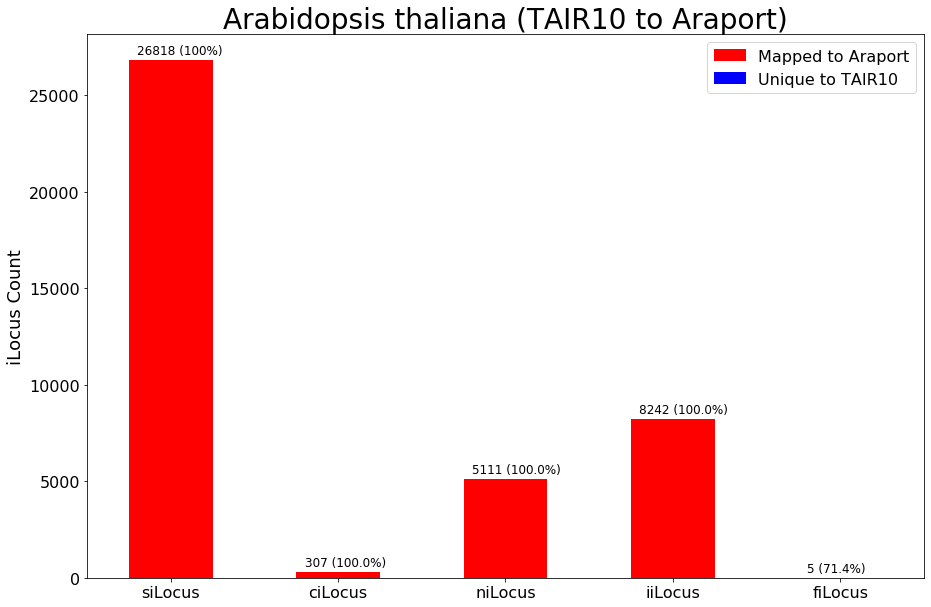

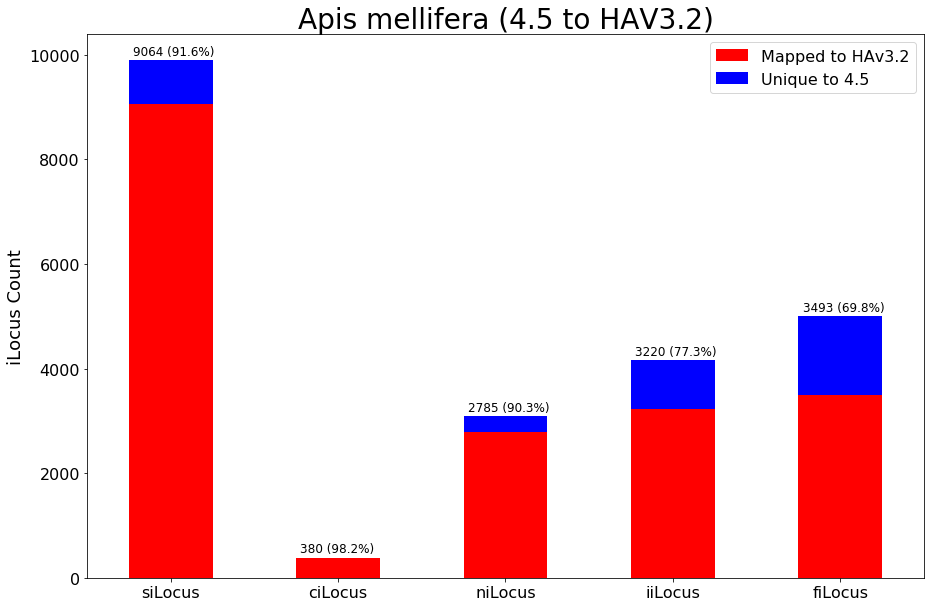

In [8]:
plot = Atha_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Arabidopsis thaliana (TAIR10 to Araport)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Atha_counts[2*i] / (Atha_counts[2*i] + Atha_counts[2*i + 1])
    if i == 0:
        conservation = int(round(conservation, 0))
    else:
        conservation = round(conservation, 1)
    plt.text(i-0.2, (Atha_pivot.sum(axis = 1)[i]) + 300, str(Atha_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)
plot = Amel_pivot.plot.bar(stacked = True, color = ['r','b'], 
                           fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Apis mellifera (4.5 to HAV3.2)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus Count')
_ = plot.yaxis.label.set_fontsize(18)
for i in range(5):
    conservation = 100*Amel_counts[2*i] / (Amel_counts[2*i] + Amel_counts[2*i + 1])
    conservation = round(conservation, 1)
    plt.text(i-0.225, (Amel_pivot.sum(axis = 1)[i]) + 100, str(Amel_counts[2*i]) + ' ('
                 + str(conservation) + '%)', fontsize = 12)

In [9]:
conserved = []
matched_new = []

for key in qsrelationsAtha['all']:
    conserved.append(key)
    for ilocus in qsrelationsAtha['all'][key][1:]:
        matched_new.append(ilocus)

In [10]:
Atha_iloci = set(ilociAtha.LocusId)
At11_iloci = set(ilociAt11.LocusId)
conserved = set(conserved)
matched_new = set(matched_new)
unique_old = Atha_iloci - conserved
unique_new = At11_iloci - matched_new
Atha_conserved = ilociAtha.loc[(ilociAtha.LocusId.isin(conserved))]
Atha_unique = ilociAtha.loc[(ilociAtha.LocusId.isin(unique_old))]
At11_unique = ilociAt11.loc[(ilociAt11.LocusId.isin(unique_new))]
data = [Atha_conserved['LogLength'], Atha_unique['LogLength'], At11_unique['LogLength']]

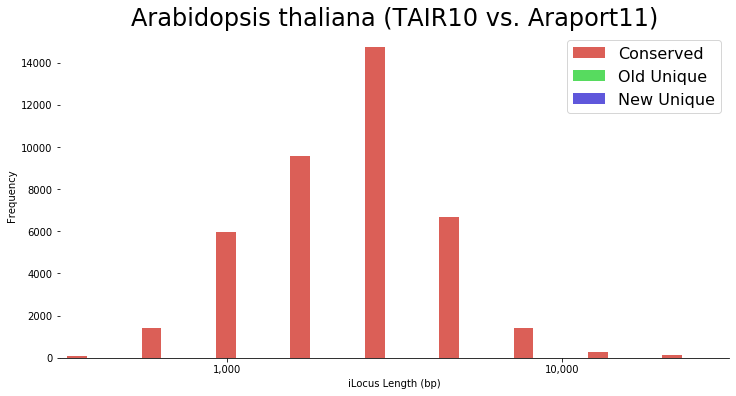

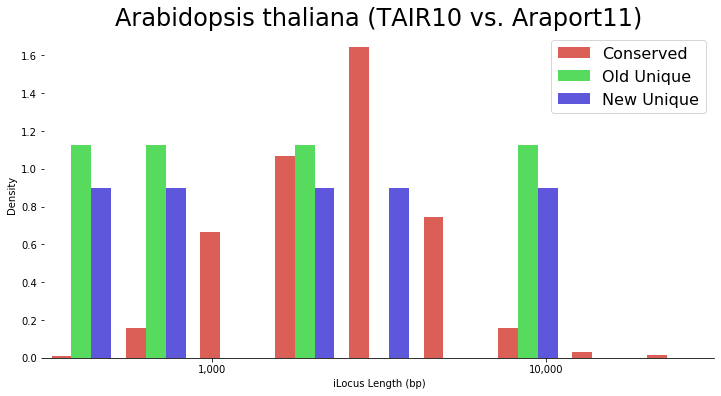

In [11]:
seaborn.set_context({"figure.figsize": (12, 6)})
plot = draw_hist(data, ylabel='Frequency', numbins=10, density=False,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 4.5),
          xticks=(3,4), xticklabs=('1,000', '10,000'),
          Title="Arabidopsis thaliana (TAIR10 vs. Araport11)")
plot = draw_hist(data, ylabel='Density', numbins=10, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 4.5),
          xticks=(3,4), xticklabs=('1,000', '10,000'),
          Title="Arabidopsis thaliana (TAIR10 vs. Araport11)")

In [12]:
conserved = []
matched_new = []

for key in qsrelationsAmel['all']:
    conserved.append(key)
    for ilocus in qsrelationsAmel['all'][key][1:]:
        matched_new.append(ilocus)

In [13]:
Amel_iloci = set(ilociAmel.LocusId)
Amh3_iloci = set(ilociAmh3.LocusId)
conserved = set(conserved)
matched_new = set(matched_new)
unique_old = Amel_iloci - conserved
unique_new = Amh3_iloci - matched_new
Amel_conserved = ilociAmel.loc[(ilociAmel.LocusId.isin(conserved))]
Amel_unique = ilociAmel.loc[(ilociAmel.LocusId.isin(unique_old))]
Amh3_unique = ilociAmh3.loc[(ilociAmh3.LocusId.isin(unique_new))]
data = [Amel_conserved['LogLength'], Amel_unique['LogLength'], Amh3_unique['LogLength']]

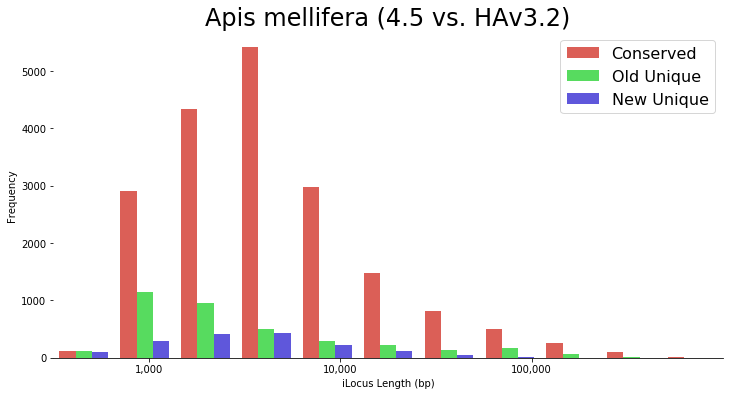

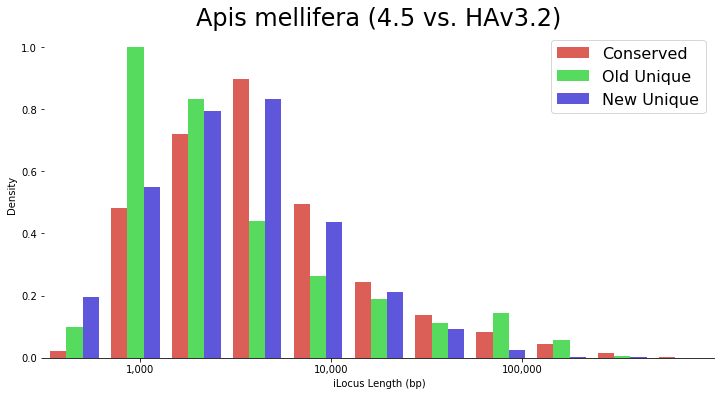

In [14]:
seaborn.set_context({"figure.figsize": (12, 6)})
draw_hist(data, ylabel='Frequency', numbins=12, density=False,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 6),
          xticks=(3,4,5), xticklabs=('1,000', '10,000', '100,000'),
          Title="Apis mellifera (4.5 vs. HAv3.2)")
draw_hist(data, ylabel='Density', numbins=12, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 6),
          xticks=(3,4,5), xticklabs=('1,000', '10,000', '100,000'),
          Title="Apis mellifera (4.5 vs. HAv3.2)")